# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели и задачи проекта**

Цель проекта - разработать алгоритм определения рыночной стоимости объектов недвижимости на основе заданных параметров.

В рамках проекта мы установим параметры, по которым будет определяться рыночная стоимость.

Для выполнения поставленной задачи мы выполним следующие действия:
- изучим имеющиеся данные и проведем их предобработку. Оценим способы написания данных. Обработаем пропуски и дубликаты, если они найдутся и если на то будет пратическая необходимость. Проверим типы данных и установим корретные, там где потребуется.
- проведем расчеты и добавим к данным новые вспомагательные показатели.
- проведем исследовательский анализ данных. Изучим данные с помощью графиков и очистим их от редких и выбивающихся значений. Оценим факторы скорости продажи расстояния до центра.
- сделаем общий вывод и оформим его.

В завершении проверим аккуратность оформления проекта, включая код и комментарии.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-наименований-колонок" data-toc-modified-id="Изменение-наименований-колонок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение наименований колонок</a></span></li><li><span><a href="#Анализ-пропусков" data-toc-modified-id="Анализ-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-отдельных-параметров" data-toc-modified-id="Изучение-отдельных-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение отдельных параметров</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Обработка-редких-и-выбивающихся-значений" data-toc-modified-id="Обработка-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обработка редких и выбивающихся значений</a></span></li><li><span><a href="#Определение-факторов,-влияющих-на-цену-квартиры" data-toc-modified-id="Определение-факторов,-влияющих-на-цену-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение факторов, влияющих на цену квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-количества-комнат" data-toc-modified-id="Зависимость-цены-от-количества-комнат-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Зависимость цены от количества комнат</a></span></li><li><span><a href="#Зависимость-цены-от-расстояния-до-центра" data-toc-modified-id="Зависимость-цены-от-расстояния-до-центра-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Зависимость цены от расстояния до центра</a></span></li><li><span><a href="#Зависимость-цены-от-категории-этажа" data-toc-modified-id="Зависимость-цены-от-категории-этажа-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Зависимость цены от категории этажа</a></span></li><li><span><a href="#Зависимость-цены-от-времени-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-времени-размещения-объявления-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Зависимость цены от времени размещения объявления</a></span></li></ul></li><li><span><a href="#Анализ-по-населенным-пунктам" data-toc-modified-id="Анализ-по-населенным-пунктам-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ по населенным пунктам</a></span></li><li><span><a href="#Определение-центрального-района-Санкт-Петербурга" data-toc-modified-id="Определение-центрального-района-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Определение центрального района Санкт-Петербурга</a></span></li><li><span><a href="#Анализ-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Анализ-квартир-в-центре-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ квартир в центре Санкт-Петербурга</a></span><ul class="toc-item"><li><span><a href="#Изучение-отдельных-параметров-(центр-Санкт-Петербурга)" data-toc-modified-id="Изучение-отдельных-параметров-(центр-Санкт-Петербурга)-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Изучение отдельных параметров (центр Санкт-Петербурга)</a></span></li><li><span><a href="#Выделение-отдельных-факторов-(центр-Санкт-Петербурга)" data-toc-modified-id="Выделение-отдельных-факторов-(центр-Санкт-Петербурга)-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Выделение отдельных факторов (центр Санкт-Петербурга)</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
# импортируем библиотеку Pandas, сохраним исходные данные в переменную и изучим их несколькими методами
import pandas as pd

# импортируем библиотеку matplotlib для изучения значений в колонках
import matplotlib.pyplot as plt

In [2]:
# прочитаем файл конструкцией try-except, чтобы обнаружить ошибки в случае их появления
try:
    data = pd.read_csv(, sep='\t')
except: 
    display('Что-то не так с чтением файла.')

display(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

1. Файл имеет нестандартный для формата .csv разделитель - \t. Сразу учтем это при его чтении с помощью аргумента `sep()` функции `read_csv()`.
2. В целом, наименования колонок записаны правильно - в змеином регистре, без заглавных букв, на одном языке. Корректировка требуется только для наименования столбца `cityCenters_nearest`.
3. Количество значений в разных колонках не совпадает. Значит есть пропуски. Необходимо изучить их природу и принять решение, что с ними делать.
4. Типы данных в нескольких колонках не кажутся оптимальными. Например, колонке `is_apartment` больше подойдет тип данных `bool`. В процессе предобработки данных мы скорретируем тип данных во всех колонках, где будет необходимо. 

## Предобработка данных

### Изменение наименований колонок

In [3]:
# запишем название колонки cityCenters_nearest в змеином регистре и проверим результат
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Анализ пропусков

###### Пропуски встречаются в следующих колонках:
- `ceiling_height` Скорее всего, авторы объявлений не знают высоту потолка, поэтому пропускают заполнение этой информации. Пропусков много, более трети всех значений, значит удалять строки с пропусками нельзя, т.к. это значительно ухудшит выборку. Заполним пропуски медианным значением. Высота потолка может отличаться в зависимости от высоты здания и типовых проектов, используемых в разных населенных пунктах. Посчитаем медиану для каждой группы, собранной по признаку локации и количества этажей в здании, и применим ее для замены соответствующих пропусков.
- `floors_total` Авторы этих объявлений или не знали этажность здания или забыли его указать. Заполним пропуски медианным значением, расчитанной для каждой отдельной локации.
- `living_area` Пропуски составляют около 10%. Можно рассчитать среднюю долю жилой площади от общей площади ОН. Затем рассчитать жилую площадь для ОН, где это значение пропущено и заменить им пропуск.
- `is_apartment` Пропуски в этой колонке скорее всего означают, что ОН не является апартаментами. Авторы объявления просто не заполняли поле, чтобы сэкономить время. Можно заменить все пропуски на 0 или False (когда изменим тип данных).
- `kitchen_area` Доля пропусков невелика - около 10%. Возможно, часть пропусков связана с тем, что ОН не имеет выделенной кухни. Например, если это студия. В этом случае можно заменить пропуски на 0. В остальных случаях следует расчитать медиану доли площади кухни и заменить ей пропуски.
- `balcony` Пропуски в этой колонке скорее всего означают, что ОН не иммет балконов. Авторы объявления просто не заполняли поле, чтобы сэкономить время. Можно заменить все пропуски на 0.
- `locality_name` Причины появления этих пропусков установить сложно. Доля пропусков очень мала. Удалим строки с пропусками в этой колонке.
- `airports_nearest` Автоматическая система по каким-то причинам не смогла определить расстояние. Доля пропусков достаточно большая - 20-25%. Причины пропусков определить сложно, а поэтому и подобрать корректную замену. Оставим пропуски без изменений.
- `city_centers_nearest` Ситуция с пропусками в этой колонке очень похожа на ситуацию с `airports_nearest` с одним но. Мы не знаем до центра какого города указано расстояние в локациях не Санкт-Петербург. То ли до центра Санкт-Петербурга, то ли до центра тех пригородов, в которых находится ОН. Оставим пропуски в этой колонке без изменений.
- `parks_around3000` и `ponds_around3000` Пропуски в этой колонке скорее всего означают, что в радиусе 3 км от ОН нет парков и прудов. Заменим пропуски в этих колонках на 0.
- `parks_nearest` и `ponds_nearest` Автоматическая система по каким-то причинам не смогла определить расстояние. Доля пропусков очень большая - более половины всех записей. Подобрать замену эти пропускам очень сложно, поэтому мы оставим их как есть.
- `days_exposition` Нам не известно, по каким причинам в этой колонке отсутствуют пропуски, но это точно не вина авторов объявлений. Доля пропусков невелика - менее 10%. Можно было бы заменить эти пропуски на среднее значение, но это не оптимальный вариант. Оставим пропуски без изменения.

In [4]:
# определим количество пропусков в колонке ceiling_height
display(data['ceiling_height'].isna().sum())

# для каждой группировки локация/этажи заменим пропуски соответствующей медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby(['locality_name', 'floors_total'])['ceiling_height'].transform('median'))

# проверим количество оставшихся пропусков
display(data['ceiling_height'].isna().sum())
# пропуски остались, скорее всего потому что по некторым группам из-за пропусков в ceiling_height медиана получилась 0

# заменим оставшиеся пропуски медианами для групп по кол-ву этажей в здании
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

# проверим количество оставшихся пропусков
display(data['ceiling_height'].isna().sum())
# пропуски снова остались, но в очень небольшой доле

# заменим их медианой по всем имеющимся значениям колонки ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# проверим количество оставшихся пропусков
display(data['ceiling_height'].isna().sum())

9195

503

78

0

In [5]:
# определим количество пропусков в колонке floors_total
display(data['floors_total'].isna().sum())

# для каждой группировки по локации заменим пропуски соответствующей медианой
data['floors_total'] = data['floors_total'].fillna(data.groupby('locality_name')['floors_total'].transform('median'))

# проверим количество оставшихся пропусков
display(data['floors_total'].isna().sum())
# пропуски снова остались, но в очень небольшой доле

# заменим их медианой по всем имеющимся значениям колонки floors_total
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

# проверим количество оставшихся пропусков
display(data['floors_total'].isna().sum())

86

1

0

In [6]:
# определим количество пропусков в колонке living_area
display(data['living_area'].isna().sum())

# сгруппируем данные по количеству комнат и для каждой группы посчитаем медианы жилой и общей площадей
# перед этим удалим пропуски, а итог сохраним в отдельную переменную
# сбросим индексы, чтобы можно было исползовать эту таблицу для объединения
nona_living_area = (
    data.dropna(subset = ['living_area'])
    .pivot_table(index = 'rooms', 
                 values = ('living_area', 'total_area'), 
                 aggfunc = 'median')
    .reset_index()
)

# добавим в таблицу колонку с расчетом отношения жилой площади к общей для каждой группы по количеству комнат
nona_living_area['living_area_ratio'] = nona_living_area['living_area'] / nona_living_area['total_area']

# добавим в исходную таблицу колонку с отношением жилой площади к общей
data['living_area_ratio'] = data.merge(nona_living_area, on = 'rooms', how = 'left')['living_area_ratio']

# заполним пропуски в колонке living_area произведением отношения и общей площади
data['living_area'] = data['living_area'].fillna(data['living_area_ratio'] * data['total_area'])

# проверим количество оставшихся пропусков
data['living_area'].isna().sum()

1903

0

In [8]:
# заменим пропуски в колонке is_apartment на False и проверим что получилось
display(data['is_apartment'].value_counts())
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

False    23649
True        50
Name: is_apartment, dtype: int64

In [9]:
# определим количество пропусков в колонке kithchen_area
display(data['kitchen_area'].isna().sum())

# сгруппируем данные по количеству комнат и для каждой группы посчитаем медианы жилой и общей площадей
# перед этим удалим пропуски, а итог сохраним в отдельную переменную
# сбросим индексы, чтобы можно было исползовать эту таблицу для объединения
nona_kitchen_area = (
    data.dropna(subset = ['kitchen_area'])
    .pivot_table(index = 'rooms', 
                 values = ('kitchen_area', 'total_area'), 
                 aggfunc = 'median')
    .reset_index()
)

# добавим в таблицу колонку с расчетом отношения жилой площади к общей для каждой группы по количеству комнат
nona_kitchen_area['kitchen_area_ratio'] = nona_kitchen_area['kitchen_area'] / nona_kitchen_area['total_area']

# добавим в исходную таблицу колонку с отношением жилой площади к общей
data['kitchen_area_ratio'] = data.merge(nona_kitchen_area, on = 'rooms', how = 'left')['kitchen_area_ratio']

# заполним пропуски в колонке living_area произведением отношения и общей площади
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area_ratio'] * data['total_area'])

# проверим количество оставшихся пропусков
display(data['kitchen_area'].isna().sum())

# хотел проверить этим кодом где именно остались пропуски, но так и не сработал
# display(data[data['kitchen_area'].isna()].groupby('rooms'))
# выдал вот такую ошибку
# <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f0fd42b2520>

# заменим оставшиеся пропуски на 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)

# проверим количество оставшихся пропусков
display(data['kitchen_area'].isna().sum())

2278

197

0

In [10]:
# заменим пропуски в колонке balcony на 0 и проверим что получилось
display(data['balcony'].value_counts())
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [11]:
# удалим строки с пропусками в колонке locality_name и проверим результат
data = data.dropna(subset = ['locality_name'])
data['locality_name'].isna().sum()

0

In [13]:
# определим количество пропусков в колонке parks_around3000
display(data['parks_around3000'].isna().sum())

# заменим пропуски на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)

# проверим оставшееся количество пропусков
data['parks_around3000'].isna().sum()

5510

0

In [14]:
# определим количество пропусков в колонке ponds_around3000
display(data['ponds_around3000'].isna().sum())

# заменим пропуски на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# проверим оставшееся количество пропусков
data['ponds_around3000'].isna().sum()

5510

0

In [16]:
# определим количество пропусков в колонке airports_nearest
display(data['airports_nearest'].isna().sum())

# для каждой группировки локация заменим пропуски соответствующей медианой
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))

# проверим количество оставшихся пропусков
data['airports_nearest'].isna().sum()

5534

5386

In [17]:
# оценим результаты работы с пропусками
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Замена типа данных

**Замену типа данных следует произвести по следующим принципам:**
- замена типа с дробного на целочисленный там, где значение не может быть дробным. Под этот критерий попадают колонки `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` и `days_exposition`.
- замена типа на дату для соответствующих значений. Под этот критерий попадает колонка `first_day_exposition`

In [18]:
# заменим дробные значения на целочисленные в выбранных колонках
data_columns_wrong_type = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
for column in data_columns_wrong_type:
    data[column] = data[column].astype('int64')

# заменим тип данных для колонки с датой
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Добавим в таблицу дополнительные расчетные данные:
- цену за квадратный метр
- день недели, месяц и год публикации объявления
- этаж квартиры: варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей

In [19]:
# добавим цену за квадратный метр
data['last_price_per_sqm'] = data['last_price'] / data['total_area']

In [20]:
# добавим день недели, месяц и год публикации объявления и проверим результат
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,last_price_per_sqm,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,NaN,0.619835,0.130316,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.600000,1,False,...,NaN,0,NaN,81.0,0.482192,0.245652,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,90.0,2,574.0,558.0,0.575472,0.166038,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,98.553719,9,False,...,84.0,3,234.0,424.0,0.619835,0.130316,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121.0,0.575472,0.166038,100000.000000,1,6,2018


In [21]:
# добавим этаж квартиры: варианты — первый, последний, другой и проверим результат
# сначала напишем функцию, которая работает со всей строкой датафрейма
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    return 'others'

# затем применим функцию к датафрейму и проверим результат
data['floor_category'] = data.apply(floor_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,last_price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,0.619835,0.130316,120370.370370,3,3,2019,others
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.600000,1,False,...,0,NaN,81.0,0.482192,0.245652,82920.792079,1,12,2018,first
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,2,574.0,558.0,0.575472,0.166038,92785.714286,3,8,2015,others
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,98.553719,9,False,...,3,234.0,424.0,0.619835,0.130316,408176.100629,4,7,2015,others
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,0.575472,0.166038,100000.000000,1,6,2018,others


In [22]:
# соотношение жилой и общей площади и отношение площади кухни к общей мы считали ранее,
# но несколько иным способом - через группировки и медианы
# на текущем этапе текущие значения в этих колонках нам не нужны,
# поэтому заменим значения в них на новые, в соответствии с требованиями задачи
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

# проверим, что в этих колонке kitchen_area_ratio не осталось пропусков
data['kitchen_area_ratio'].isna().sum()

0

## Исследовательский анализ данных

### Изучение отдельных параметров

Изучим некоторые параметры исходных данных: площадь, цену, число комнат, высоту потолков. Построим гистограммы для каждого параметра.

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

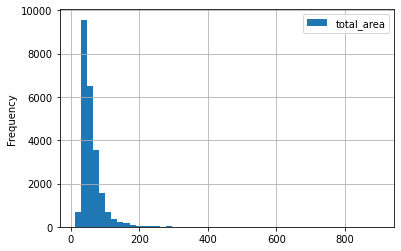

In [23]:
# изучим параметр total_area методом describe и с помощью гистограммы
display(data['total_area'].describe())
data.plot(kind='hist', y='total_area', bins=50, legend=True, grid=True)

**Вывод: общая площадь**

Данные по общей площади имеют близкое к нормальному распределение. 75% квартир имеют площадь в пределах 70 м2, что похоже на правду. Минимальное и максимальное значения хоть и имеют экстремальные значения, но все же могут встречаться в жизни.

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: last_price_per_sqm, dtype: float64

count    2.365000e+04
mean     9.943180e+04
std      5.033794e+04
min      1.110000e+02
25%      7.661425e+04
50%      9.500000e+04
75%      1.142740e+05
max      1.907500e+06
Name: last_price_per_sqm, dtype: float64

<AxesSubplot:ylabel='Frequency'>

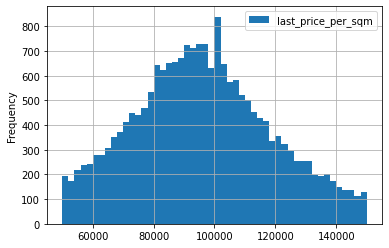

In [24]:
# изучим параметр last_price_per_sqm методом describe и с помощью гистограммы
display(data['last_price_per_sqm'].head())
display(data['last_price_per_sqm'].astype('int64').describe())
data.plot(kind='hist', y='last_price_per_sqm', bins=50, range=(50000, 150000), legend=True, grid=True)

**Вывод: цена**

Данные по ценам имеют нормальное распределение. Средняя цена около 100 т.р. за м2 выглядит правдоподобно. В то же время есть много аномальных значений.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

total_area
rooms open_plan studio            
0     False     True           138
      True      False           59

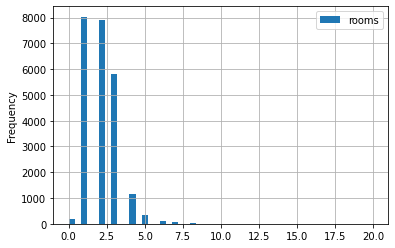

In [25]:
# изучим параметр rooms методом describe и с помощью гистограммы
display(data['rooms'].describe())
data.plot(kind='hist', y='rooms', bins=50, range=(0, 20), legend=True, grid=True)

# проверим взаимосвязь квартир с нулевым количеством комнат с двнными в колонках open_plan и studio 
data.query('rooms == 0').pivot_table(index=('rooms', 'open_plan', 'studio'), values='total_area', aggfunc='count')

**Вывод: комнаты**

Данные по количеству комнат имеют близкое к нормальному распределение. 75% квартир имеют до 3-х комнат, что выглядит правдоподобно. Квартиры без комнат - это либо студии, либо квартиры с открытой планировкой. Квартиры более чем пятью комнатами могут относиться к уникальным предложениям.

count    23650.000000
mean         2.739147
std          1.007506
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

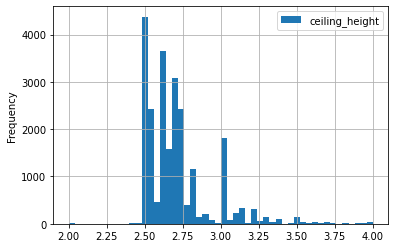

In [26]:
# изучим параметр ceiling_height методом describe и с помощью гистограммы
display(data['ceiling_height'].describe())
data.plot(kind='hist', y='ceiling_height', bins=50, range=(2, 4), legend=True, grid=True)

**Вывод: высота потолка**

Большинство квартир имееют высоту потолка, близкую к стандартным 2,7 метра. Скорее всего это квартиры в домах типовой застройки. Также есть немало квартир с более высокими потолками. Вероятно, большинство из них расположены в Санкт-Петербурге, в старом фонде. Экстремумы типа 1м и 100м выглядят аномально. Скорее всего это ошибки и от них будет логично избавится.

### Изучение времени продажи квартиры

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Определим, когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

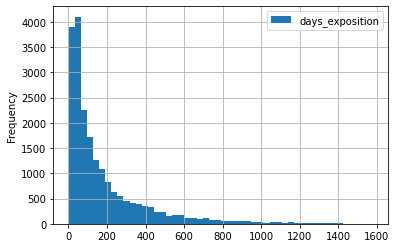

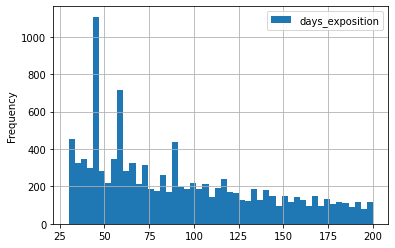

180.7531998045921

95.0

In [27]:
# изучим параметр days_exposition методом describe
display(data['days_exposition'].describe())

# постоим гистограмму
data.plot(kind='hist', y='days_exposition', bins=50, legend=True, grid=True)
plt.show()
data.plot(kind='hist', y='days_exposition', bins=50, range=(30, 200), legend=True, grid=True)
plt.show()

# среднее и медиану мы можем взять из предыдущих результатов
# среднее рассчитано методом describe - 168
# медиана равна значению второго персентиля - 90
# посчитаем эти показатели еще раз для самопроверки
display(data['days_exposition'].mean())
display(data['days_exposition'].median())

**Вывод: время продажи квартиры**

Большинство квартир продаются в диапазоне от 1,5 до 6 месяцев. Среднее время продажи - 3 месяца. 

Также, было бы правильно определить нормативные сроки продаж для разных категорий квартир - маленьких и больших, дорогих и дешевых. Потому что например, однушки всегда будут продаваться быстрее трешек и тем более пятикомнатных. Пол года продавать однушку - это долго, а для пятикомнатной это нормально.

Если пренебречь прочими факторами, то скорость продажи квартиры можно категоризировать следующим образом:
- ОЧЕНЬ БЫСТРО - до 30 дней
- БЫСТРО - от 30 до 60 дней
- НОРМАЛЬНО - от 60 до 120 дней
- ДОЛГО - от 120 до 180 дней
- ОЧЕНЬ ДОЛГО - более 180 дней

### Обработка редких и выбивающихся значений

Проанализируем все столбцы с помощью графика "ящик с усами". Опишем обнаруженные особенности. Уберем редкие и выбивающиеся значения.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

<AxesSubplot:>

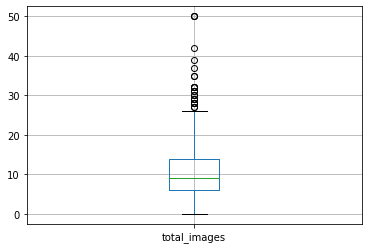

In [29]:
# простроим диаграмму размаха для колонки total_images
data.boxplot(column='total_images')

В некоторых объявлениях встречается от 25 до 50 фотографий. Это нетипично много, но никак не искажает статистику. Много фотографий - это хорошо, если они качественные и помогают изучить объект. Оставим эту колонку без изменений.

Пропустим колонку last_price, вместе нее позднее проверим колонку last_price_per_sqm

(1.0, 150.0)

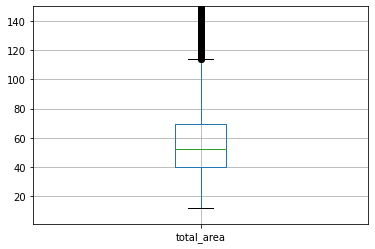

In [30]:
# простроим диаграмму размаха для колонки total_area
data.boxplot(column='total_area')
plt.ylim(1, 150)

Выборка содержит много больших выбивающихся значений, т.к. точки сливаются в линию. Все квартиры площадью более 115 м2 оказываются за пределами графика. Возможно, такие большое квартиры действительно продаются, но цена на них будет определяться уникальным способом. Данные по ним не подойдут для создания механизма автоматического определения цены.

Маленькие квартиры тоже есть. Например, квартиры менее 18-20 м2 выглядят странно, возможно это продаются комнаты. Но также возможно, что это очень маленькие студии в новостройках. Маленькие значения оставим без изменений.

In [31]:
# ограничим выборку макисмальным значением 120 м2 и запишем срез в новую переменную
clean_data = data.query('total_area <= 120')

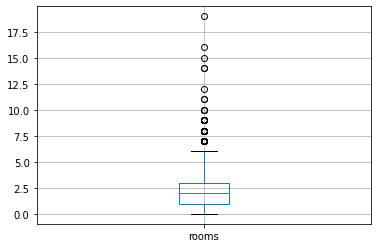

<AxesSubplot:>

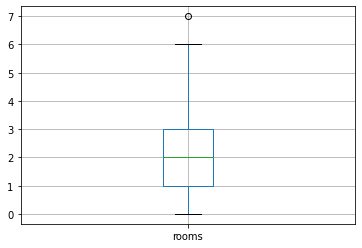

In [32]:
# простроим диаграмму размаха для колонки rooms по общим данным
data.boxplot(column='rooms')
plt.show()

# и по чистым данным
clean_data.boxplot(column='rooms')

На диаграмме, построенной по общим данным видны квартиры с большим количеством комнат. Это редкие экземпляры, которые являются выбросами. На диаграмме, построенной по чистым данным, их почти нет. Значит логичная взаимосвязь между квартирами с большой площадью и квартирами с большим количеством комнат имеется.

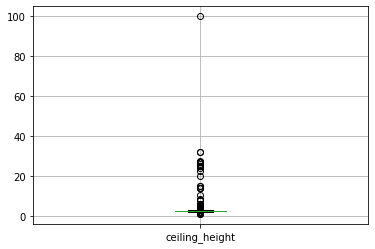

<AxesSubplot:>

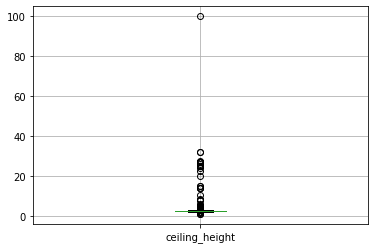

In [33]:
# простроим диаграмму размаха для колонки ceiling_height по общим данным
data.boxplot(column='ceiling_height')
plt.show()

# и по чистым данным
clean_data.boxplot(column='ceiling_height')

В данных по высоте потолков очень много выбросов. Выбросы скорее всего свидетельствуют об ошибках или неправильных данных, потому что у квартир вряд ли может быть такая большая или маленькая высота потолка. Странно, что в чистых данных выбросы остались без изменения. 

In [34]:
# ограничим выборку макисмальным и минимальным значениями и запишем срез в переменную с чистыми данными
clean_data = clean_data.query('2.2 <= ceiling_height <= 3.1')

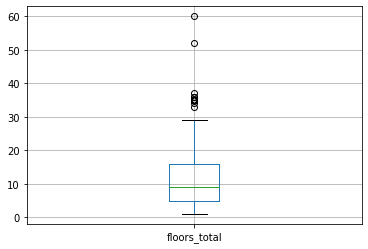

<AxesSubplot:>

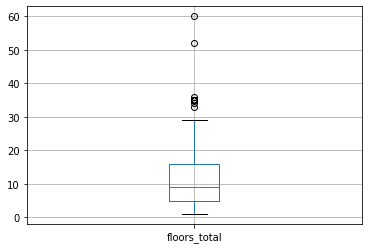

In [35]:
# простроим диаграмму размаха для колонки floors_total по общим данным
data.boxplot(column='floors_total')
plt.show()

# и по чистым данным
clean_data.boxplot(column='floors_total')

В данных по количеству этажей также присутствуют выбросы. Но они не кажутся аномальными, потому что здания с 60-ю этажами вполне могут существовать. Оставить все значения без изменений.

В данных по высоте потолка присутствуют незначительные выбросы. Но они не кажутся аномальными, потому оставим их без изменений.

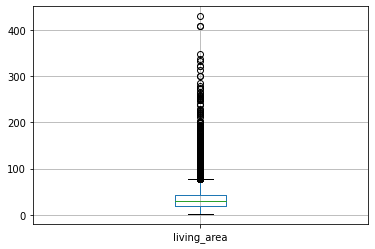

<AxesSubplot:>

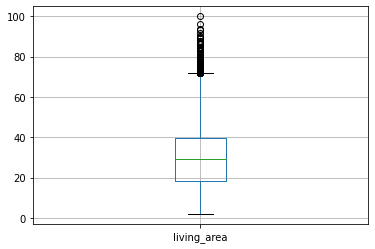

In [36]:
# простроим диаграмму размаха для колонки living_area по общим данным
data.boxplot(column='living_area')
plt.show()

# и по чистым данным
clean_data.boxplot(column='living_area')

В жилой площади присутсвует много выбросов. В очищенных данных их ожидаемо меньше и они укладываются в то ограчние, которое мы задачи для чистых данных по общей площади. Оставим эти данные без изменения.

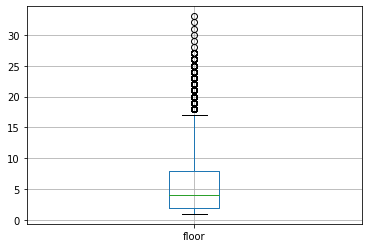

<AxesSubplot:>

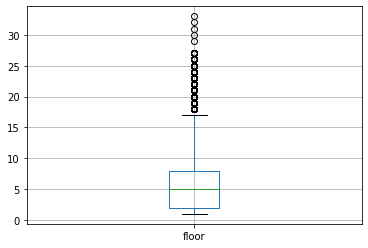

In [37]:
# простроим диаграмму размаха для колонки floor по общим данным
data.boxplot(column='floor')
plt.show()

# и по чистым данным
clean_data.boxplot(column='floor')

В данных по этажу есть выбросы, но они не являются аномальными. Оставим данные без изменения.

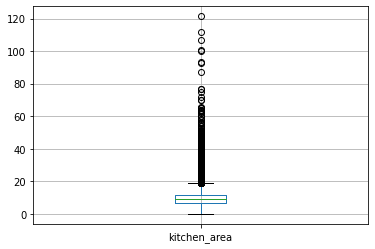

<AxesSubplot:>

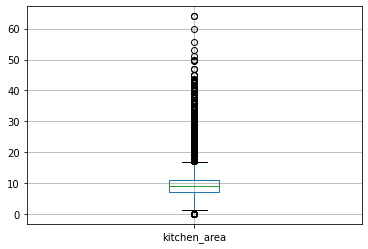

In [38]:
# простроим диаграмму размаха для колонки kitchen_area по общим данным
data.boxplot(column='kitchen_area')
plt.show()

# и по чистым данным
clean_data.boxplot(column='kitchen_area')

Выбросы по площади кухни выглядят аномально. Даже в очищенных данных, где общая площадь не превышает 120 м2, есть кухни площадью 60 м2. Это подозрительно, но не настролько, чтобы сокращать выборку. Оставим данные без изменения.

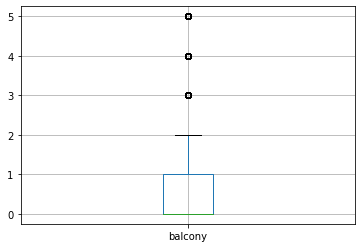

<AxesSubplot:>

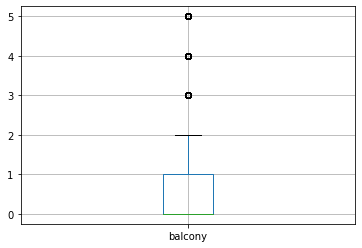

In [39]:
# простроим диаграмму размаха для колонки balcony по общим данным
data.boxplot(column='balcony')
plt.show()

# и по чистым данным
clean_data.boxplot(column='balcony')

Выбросы в количестве балконов не выглядят аномально. Оставим данные без изменений.

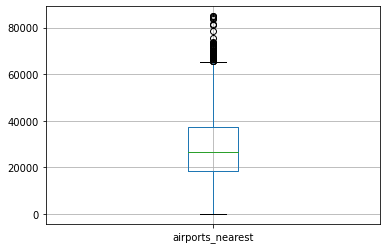

<AxesSubplot:>

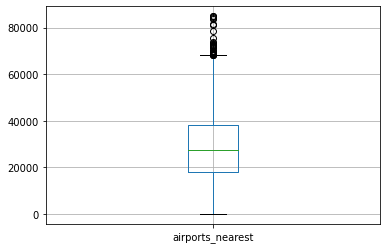

In [40]:
# простроим диаграмму размаха для колонки airports_nearest по общим данным
data.boxplot(column='airports_nearest')
plt.show()

# и по чистым данным
clean_data.boxplot(column='airports_nearest')

Выбросы в расстоянии до аэропорта имеются, но не обязательно будут аномальными. Некоторые населенные пункты могут быть удалены от аэропорта значительно дальше других. Оставляем выбросы без изменения.

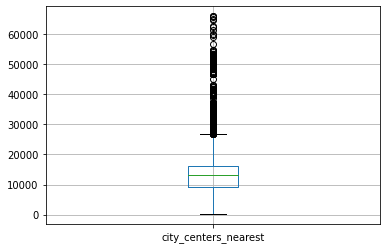

<AxesSubplot:>

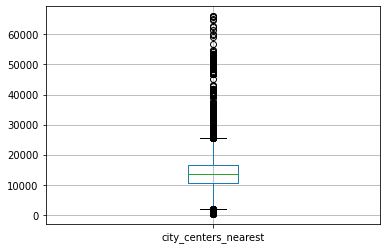

In [41]:
# простроим диаграмму размаха для колонки city_centers_nearest по общим данным
data.boxplot(column='city_centers_nearest')
plt.show()

# и по чистым данным
clean_data.boxplot(column='city_centers_nearest')

У колонки с расстоянием до центра города очень много выбросов. Причем они есть в обе стороны. Об аномальности выбросов в этой колонке судить сложно. Мы не знаем до центра какого города посчитано это расстояние. Кроме того, квартиры действительно могут быть очень удалены или очень приближены к центру. Оставим эти выбросы без изменения.

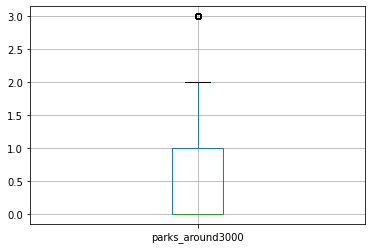

<AxesSubplot:>

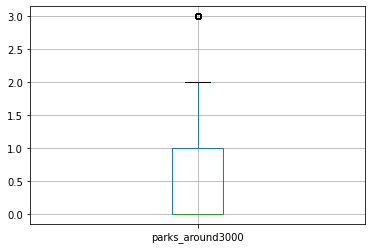

In [42]:
# простроим диаграмму размаха для колонки parks_around3000 по общим данным
data.boxplot(column='parks_around3000')
plt.show()

# и по чистым данным
clean_data.boxplot(column='parks_around3000')

Выбросы в количестве парков в радиусе 3 км не выглядят аномально. Оставим данные без изменений.

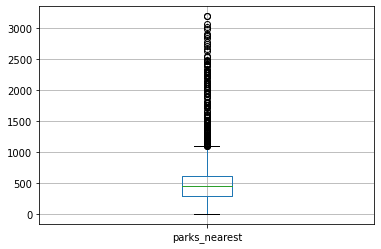

<AxesSubplot:>

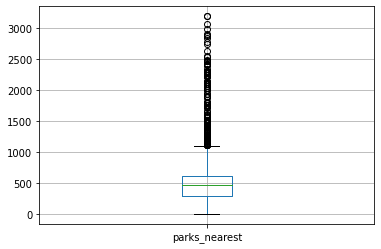

In [43]:
# простроим диаграмму размаха для колонки parks_nearest по общим данным
data.boxplot(column='parks_nearest')
plt.show()

# и по чистым данным
clean_data.boxplot(column='parks_nearest')

График говорит нам о том, что у всех объявлений, где есть данные о расстоянии до парка, ближайший парк находится на расстоянии в пределах 3 км. Выбросы на этом графике не являются аномальными. Оставим данные без изменений.

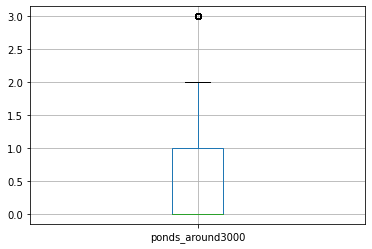

<AxesSubplot:>

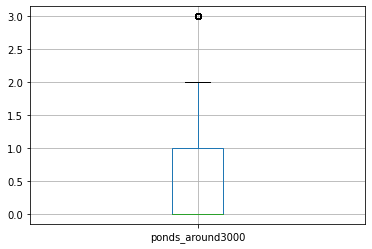

In [44]:
# простроим диаграмму размаха для колонки ponds_around3000 по общим данным
data.boxplot(column='ponds_around3000')
plt.show()

# и по чистым данным
clean_data.boxplot(column='ponds_around3000')

Результаты диаграммы очень похожи на график с количеством парков в радиусе 3 км. Логично, потому что пруды часто распологаются в парках. Выбросы в количестве прудов в радиусе 3 км не выглядят аномально. Оставим данные без изменений.

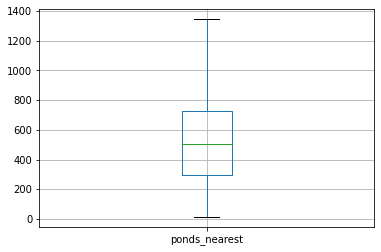

<AxesSubplot:>

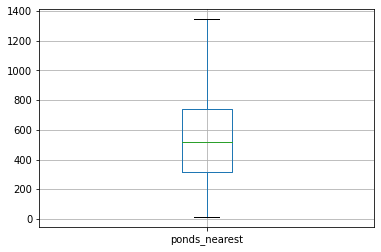

In [45]:
# простроим диаграмму размаха для колонки ponds_nearest по общим данным
data.boxplot(column='ponds_nearest')
plt.show()

# и по чистым данным
clean_data.boxplot(column='ponds_nearest')

Интересно, что на графике нет выбросов. Расстояние до пруда у всех объявлений, где есть этот параметр, находится в рамках межквартильного размаха.

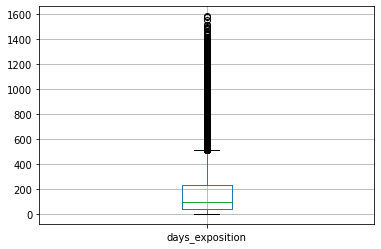

<AxesSubplot:>

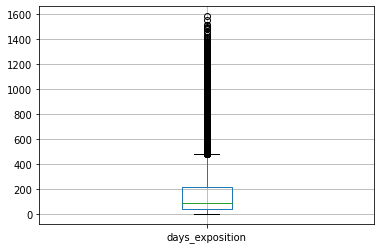

In [46]:
# простроим диаграмму размаха для колонки days_exposition по общим данным
data.boxplot(column='days_exposition')
plt.show()

# и по чистым данным
clean_data.boxplot(column='days_exposition')

В данных по количеству дней экспозиции очень много выбросов. Некоторые обявлении находятся в размещении годами. Скорее всего это ошибки или аномалии. Например, квартира уже продана, но автор не снял объявление с публикации. Такие данные в некоторых случаях могут быть полезны. А если например квартира действительно долго не продается, то это может быть связано с неадекватными условиями продажи. Или с фиктивными объявлениями, которые выкладывают риэлторы и агентства недвижимости для привлечения клиентов.

Второй вариант более вероятен, потому что после совершения сделки автор заинтересован снять объявление с публикации, чтобы не получать лишних звоноков. Очистим данные от выбросов по значению межквартильного размаха.

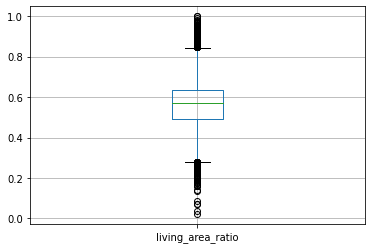

<AxesSubplot:>

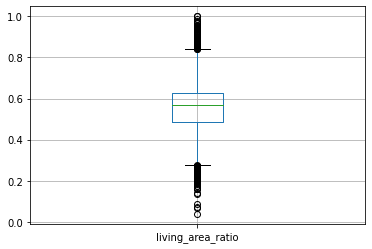

In [48]:
# простроим диаграмму размаха для колонки living_area_ratio по общим данным
data.boxplot(column='living_area_ratio')
plt.show()

# и по чистым данным
clean_data.boxplot(column='living_area_ratio')

По диаграмме размаха параметра доли жилой площади мы можем сделать следующие выводы. Все значения находятся в пределах диапазона 0 и 1, значит ошибок нет. Выбросы есть и их много. Максимальные выбросы имеют право на существование, например, в квартирах с открытой планировкой. Минимальные выбросы выглядят аномально и похожи на ошибки. Мы не знаем природу этих ошибок, поэтому удалять данные не будем.

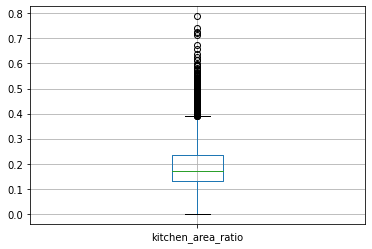

<AxesSubplot:>

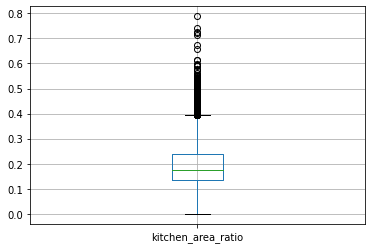

In [49]:
# простроим диаграмму размаха для колонки kitchen_area_ratio по общим данным
data.boxplot(column='kitchen_area_ratio')
plt.show()

# и по чистым данным
clean_data.boxplot(column='kitchen_area_ratio')

По диаграмме размаха параметра доли площади кухни мы можем сделать следующие выводы. Все значения находятся в пределах диапазона 0 и 1, значит ошибок нет. Выбросы есть и их относительно много. Не все, но самые максимальные выбросы похожи на ошибки. Мы не знаем природу этих ошибок, поэтому удалять данные не будем.

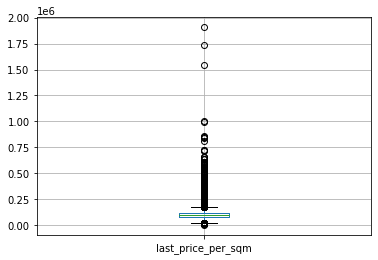

(0.0, 200000.0)

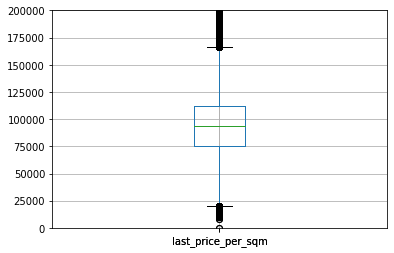

In [50]:
# простроим диаграмму размаха для колонки last_price_per_sqm по общим данным
data.boxplot(column='last_price_per_sqm')
plt.show()

# и по чистым данным
clean_data.boxplot(column='last_price_per_sqm')

# очистим диаграмму от сиьлных выбросов ограничив ее по оси y
clean_data.boxplot(column='last_price_per_sqm')
plt.ylim(0, 200000)

На обоих графиках есть значительное количество выбросов. В чистых данных их заметно меньше, но все же немало. Максимальные выбросы мы не можем считать ошибками, тк цены на недвижимость могут достигать самых смелых величин. Гораздо интереснее минимальные выбросы. Это может быт как дешевое жилье, так и мошенничество или способ привлечь внимание.

In [51]:
# ограничим ранее очищенную выборку минимальным значением по цене в 25 000 за м2
clean_data = clean_data.query('last_price_per_sqm >= 25000')

**Вывод по обработке редких и выбивающихся значений**

Мы обработали большинство колонок на предмет наличия редких и выбивающихся значений с помощью диаграммы рассеивания. Некоторые колонки не требовали обработки, потому что имели соответствующий тип данных или просто в этом не было практической ценности. По итогу обработки мы создали новый массив данных, очищенных от аномальных значений по парамтерам `total_area`, `ceiling_height`, `last_price_per_sqm`. Также мы обнаружили, что в колонках `days_exposition` и `last_price_per_sqm` могут содержаться аномальные значения, которые указывают на наличие мошенников или недобросовестных авторов объявлений.

### Определение факторов, влияющих на цену квартиры

В текущем разделе мы ответим на вопрос, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость цены от площади

0.11525465335223804

<AxesSubplot:xlabel='total_area', ylabel='last_price_per_sqm'>

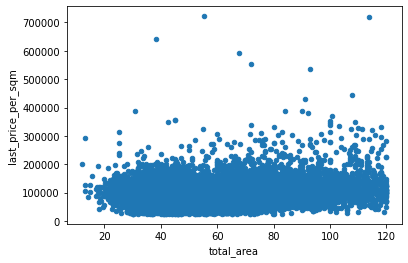

In [52]:
# оценим корреляцию между ценой и площадью
display(clean_data['last_price_per_sqm'].corr(clean_data['total_area'])) 

# построим диаграмму рассеивания по переменным цены и площади
clean_data.plot(x='total_area', y='last_price_per_sqm', kind='scatter')

**Вывод**

Коэффициент корреляции близок к нулю, значит два параметра имеют очень низку взаимосвязь. Диаграмма рассеивания подтверждает этот вывод. На самом деле это странно, потому что большие квартиры чаще всего имеют меньшую стоимость за м2, чем маленькие. Проще говоря, маленькие квартиры более ликвидные и от того имеют большую стоимость на м2.

#### Зависимость цены от количества комнат

-0.11801185235307385

<AxesSubplot:xlabel='rooms', ylabel='last_price_per_sqm'>

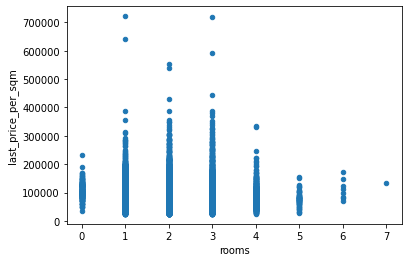

In [53]:
# оценим корреляцию между ценой и количеством комнат
display(clean_data['last_price_per_sqm'].corr(clean_data['rooms'])) 

# построим диаграмму рассеивания по переменным цены и комнат
clean_data.plot(x='rooms', y='last_price_per_sqm', kind='scatter')

**Вывод**

Коэффициент корреляции близок к нулю, значит два параметра имеют очень низкую взаимосвязь. Диаграмма рассеивания подтверждает этот вывод.

#### Зависимость цены от расстояния до центра

-0.38798425130472225

<AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price_per_sqm'>

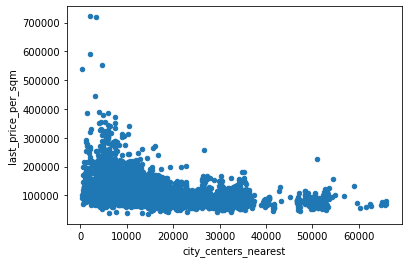

In [54]:
# оценим корреляцию между ценой и расстоянием до центра
display(clean_data['last_price_per_sqm'].corr(clean_data['city_centers_nearest'])) 

# построим диаграмму рассеивания по переменным цены и расстояния до центра
clean_data.plot(x='city_centers_nearest', y='last_price_per_sqm', kind='scatter')

**Вывод**

Отрицательный коэффициент корреляции подтверждает логичный вывод, что цена имеет обратную зависимость от расстояния до центра. Однако, интересно то, что зависимость относительно невысокая. Это значит, что не все квартиры дорожают по мере приближения к центру города. Скорее всего, в центре есть отдельные лоты с высокой стоимостью.

In [55]:
# выведем корреляционную матрицу для количественных переменных
clean_data[['last_price', 'total_area', 'city_centers_nearest']].corr()

,last_price,total_area,city_centers_nearest
last_price,1.000000,0.702879,-0.315415
total_area,0.702879,1.000000,-0.153089
city_centers_nearest,-0.315415,-0.153089,1.000000


**Вывод**

На корреляционной матрице мы видим довольно сильную прямую зависимость площади и цены. А также менее сильную обратную зависимость цены и удаленности от центра. Обе взаимосвязи очевидны, логичны, хотя мы ожидали, что эти связи будут сильнее.

Взаимосвязь площади и удаленности от центра относительно невелика.

#### Зависимость цены от категории этажа

In [56]:
# поскольку категория этажа - это категориальная переменная,
# оценим зависимость цены от этой переменной через анализ средней и медианы по каждой категории
display(clean_data.query('floor_category == "first"')['last_price_per_sqm'].describe())
display(clean_data.query('floor_category == "last"')['last_price_per_sqm'].describe())
display(clean_data.query('floor_category == "others"')['last_price_per_sqm'].describe())
# price_floor_barplot = [['first', 'last', 'others'], [81180, 87322, 99987]]
# price_floor_barplot.plot(kind='bar')

count      2592.000000
mean      81180.719880
std       30249.077097
min       25000.000000
25%       62148.351181
50%       80849.016034
75%       96928.599695
max      387096.774194
Name: last_price_per_sqm, dtype: float64

count      2814.000000
mean      87322.219753
std       35710.289456
min       25000.000000
25%       64623.510293
50%       86051.308241
75%      104436.274510
max      370497.017893
Name: last_price_per_sqm, dtype: float64

count     15809.000000
mean      99987.068669
std       34675.349124
min       25000.000000
25%       80555.555556
50%       97368.421053
75%      115264.797508
max      721518.987342
Name: last_price_per_sqm, dtype: float64

**Вывод**

Значения средней и медианы цены подтверждают наличие зависимости от категории этажа. Первый этаж имеет самые низкие значения. Последний - чуть выше, но ненамного. Категория `others` имеет самые высокие значений. Значит квартиры на крайних этажах чаще всего продаются с дисконтом.

#### Зависимость цены от времени размещения объявления

In [57]:
# поскольку время размещения - это категориальная переменная,
# оценим зависимость цены от этой переменной через анализ средней и медианы по каждой категории
display(clean_data.pivot_table(
    index='weekday_exposition',
    values='last_price_per_sqm', 
    aggfunc=('count', 'mean','median')
))
display(clean_data.pivot_table(
    index='month_exposition',
    values='last_price_per_sqm', 
    aggfunc=('count', 'mean','median')
))
display(clean_data.pivot_table(
    index='year_exposition',
    values='last_price_per_sqm', 
    aggfunc=('count', 'mean','median')
))

# дополнительно оценим зависимость общей цены от года размещения
display(clean_data.pivot_table(
    index='year_exposition',
    values='last_price', 
    aggfunc=('count', 'mean','median')
))

,count,mean,median
weekday_exposition,,,
0,3245,95446.206829,93548.387097
1,3770,96311.368994,94854.123321
2,3539,96490.085557,94444.444444
3,3773,96428.812817,93949.579832
4,3616,96089.454927,93885.413488
5,1734,94986.393735,92721.252258
6,1538,95288.504121,93868.778281


,count,mean,median
month_exposition,,,
1,1342,95722.085513,94437.718590
2,2369,95626.083125,94170.403587
3,2313,96059.262703,94387.755102
4,2145,97404.088264,95555.555556
5,1127,94714.013163,91891.891892
6,1579,94885.295722,92000.000000
7,1496,95719.253340,93952.455590
8,1570,97777.583250,95216.912388
9,1782,97270.548015,94805.025671


,count,mean,median
year_exposition,,,
2014,98,110135.584085,104851.674641
2015,979,96157.631906,91106.290672
2016,2436,93747.965643,90786.914235
2017,7388,93700.800534,91379.310345
2018,7731,96161.865757,95161.290323
2019,2583,103697.316767,102759.295499


,count,mean,median
year_exposition,,,
2014,98,7.790584e+06,6200000.0
2015,979,5.811967e+06,4900000.0
2016,2436,5.215737e+06,4300000.0
2017,7388,5.148489e+06,4300000.0
2018,7731,5.168527e+06,4450000.0
2019,2583,5.591383e+06,4900000.0


**Вывод**

Зависимость цены от дня недели, когда было размещено объявление, не обнаружено. В разрезе месяцов наблюдается сезонность - в начале весны и начале осени цены поднимаются. Медиана по годам говорит о росте стоимости. Среднее косвенно подтверждает динамику медианы.

**Общий вывод по факторам**

В рамках анализа нам удалось обнаружить обратную зависимость цены квартиры от расстояния до центра города и зависимость от категории этажа. Кроме того, мы обнаружили незначительную сезонную зависимость от месяца размещения объявления.

В рамках анализа мы не обнаружили существенную зависимость от площади и колиечества комнат, а также от дня недели размещения.

### Анализ по населенным пунктам

Проведем анализ объявлений по населенным пунктам. Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

,count,mean
locality_name,,
Санкт-Петербург,13783,109792.501645
посёлок Мурино,520,85725.241381
посёлок Шушары,438,78643.827638
Всеволожск,391,68627.823164
Пушкин,334,102145.234234
Колпино,328,75458.930169
посёлок Парголово,326,90332.263023
деревня Кудрово,299,92473.547576
Гатчина,298,69216.950865


,count,mean
locality_name,,
Санкт-Петербург,13783,109792.501645


,count,mean
locality_name,,
Выборг,200,58020.397303


<AxesSubplot:xlabel='locality_name'>

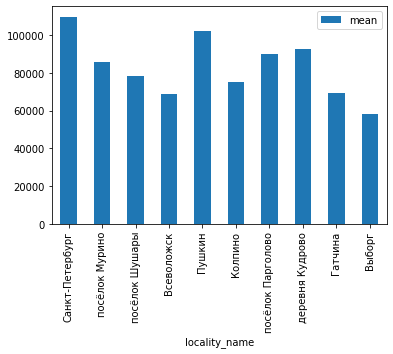

In [58]:
# выберем 10 населённых пунктов с наибольшим числом объявлений, отсортируем, посчитаем среднее значение цены
top10_locations = clean_data.pivot_table(
    index='locality_name', 
    values='last_price_per_sqm', 
    aggfunc=('count','mean')
).sort_values(by='count', ascending=False).head(10)

display(top10_locations)

# выведем населенный пункт с самой высокой
display(top10_locations.sort_values(by='mean', ascending=False).head(1))

# и самой низкой стоимостью жилья
display(top10_locations.sort_values(by='mean', ascending=False).tail(1))

top10_locations.plot(kind='bar', y='mean')

**Вывод анализа по населенным пунктам**

Анализ объявлений по населенным пунктам позволил нам выявить где больше всего размещается объявлений и какая там средняя цена. Кроме того, мы определили населенные пункты с самой высокой и самой низкой ценой. Ожидаемо, самая высокая цена получилась в СПб, а вот прекрасный Выборг занял последнее место неожиданно.

### Определение центрального района Санкт-Петербурга

Для определения границ центра Санкт-Петербурга мы изучим и обработаем данные. Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

<AxesSubplot:xlabel='city_centers_nearest_km'>

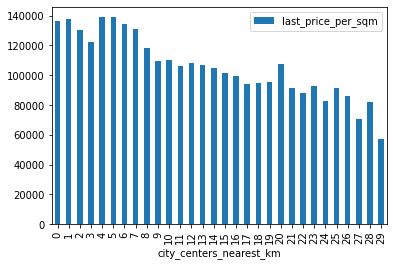

In [59]:
# выделим квартиры в Санкт-Петербурге, 
clean_data_stpete = (
    clean_data.dropna(subset = ['city_centers_nearest'])
    .query('locality_name == "Санкт-Петербург"')
    .reset_index()
)

# создадим столбец с расстоянием до центра в километрах
clean_data_stpete['city_centers_nearest_km'] = clean_data_stpete['city_centers_nearest'] / 1000

# округлим до целых значений
clean_data_stpete['city_centers_nearest_km'] = clean_data_stpete['city_centers_nearest_km'].astype('int64')

# посчитаем среднюю цену для каждого километра и построим график
clean_data_stpete.pivot_table(
    index='city_centers_nearest_km', 
    values='last_price_per_sqm', 
    aggfunc = 'mean'
).plot(y='last_price_per_sqm', kind='bar')

**Вывод**

Результаты анализа показывают, что резкое снижение стоимости происходит на 7-9 км. Будем считать, что границей центра является 8-й км.

### Анализ квартир в центре Санкт-Петербурга

Для анализа стоимости квартир в центре Санкт-Петербурга мы проведем ряд операций. Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Ответим на вопрос, отличаются ли выводы по этим данным от общих выводов по всей базе?

In [60]:
# выделим квартиры в центре Санкт-Петербурга, 
clean_data_stpete_center = clean_data_stpete.query('city_centers_nearest_km <= 8').reset_index()

#### Изучение отдельных параметров (центр Санкт-Петербурга)

count    2789.000000
mean       66.528412
std        23.422111
min        12.000000
25%        46.300000
50%        64.800000
75%        83.800000
max       120.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

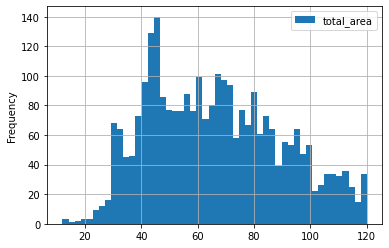

In [61]:
# изучим параметр total_area методом describe и с помощью гистограммы
display(clean_data_stpete_center['total_area'].describe())
clean_data_stpete_center.plot(kind='hist', y='total_area', bins=50, legend=True, grid=True)

**Вывод: общая площадь**

Данные по общей площади имеют близкое к нормальному распределение. 75% квартир имеют площадь в пределах 83 м2, что похоже на правду. В целом, площадь квартир в центре немного больше, чем в общей выборке.

count      2789.000000
mean     131213.847167
std       49103.140742
min       37234.042553
25%      100804.597701
50%      122341.513292
75%      146799.765120
max      721518.987342
Name: last_price_per_sqm, dtype: float64

<AxesSubplot:ylabel='Frequency'>

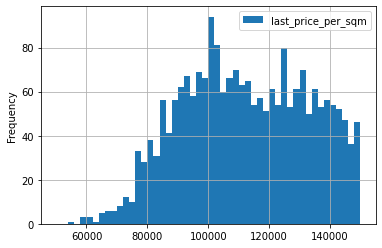

In [62]:
# изучим параметр last_price_per_sqm методом describe и с помощью гистограммы
display(clean_data_stpete_center['last_price_per_sqm'].describe())
clean_data_stpete_center.plot(kind='hist', y='last_price_per_sqm', bins=50, range=(50000, 150000), legend=True, grid=True)

**Вывод: цена**

Средняя цена составляет 131 000 за м2. Также много значений выше средней. Эти параметры значительно выше, чем в общей выборке и это логично.

count    2789.000000
mean        2.243456
std         0.948777
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

total_area
rooms open_plan studio            
0     False     True            13
      True      False            4

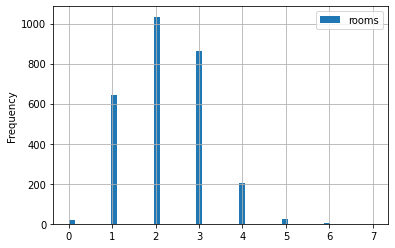

In [63]:
#изучим параметр rooms методом describe и с помощью гистограммы
display(clean_data_stpete_center['rooms'].describe())
clean_data_stpete_center.plot(kind='hist', y='rooms', bins=50, range=(0, 7), legend=True, grid=True)

# проверим взаимосвязь квартир с нулевым количеством комнат с двнными в колонках open_plan и studio 
clean_data_stpete_center.query('rooms == 0').pivot_table(index=('rooms', 'open_plan', 'studio'), values='total_area', aggfunc='count')

**Вывод: комнаты**

Данные по количеству комнат имеют близкое к нормальному распределение. 75% квартир имеют до 3-х комнат, что выглядит правдоподобно. Квартиры без комнат - это либо студии, либо квартиры с открытой планировкой. Квартиры более чем пятью комнатами могут относиться к уникальным предложениям. Данные по центру города совпадают с общими данными.

count    2789.000000
mean        2.787626
std         0.190232
min         2.400000
25%         2.600000
50%         2.750000
75%         3.000000
max         3.100000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

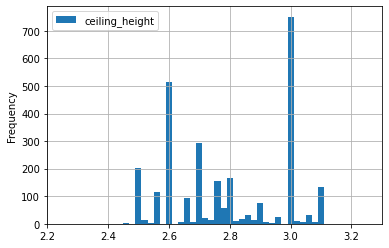

In [64]:
# изучим параметр ceiling_height методом describe и с помощью гистограммы
display(clean_data_stpete_center['ceiling_height'].describe())
clean_data_stpete_center.plot(kind='hist', y='ceiling_height', bins=50, range=(2.25, 3.25), legend=True, grid=True)

**Вывод: высота потолка**

Большинство квартир имееют высоту потолка, близкую к стандартным 2,7 метра. Но больше всего квартир с потолками 3 м, что соответствует старому фонду центра города.

**Общий вывод по изучению отдельных параметров**

Большинство параметров по центру Санкт-Петербурга совпадает с общими данными. При этом в центре города преобладают квартиры с высокими потолками. Цены в центре заметно выше, а также больше дорогих квартир, что в целом логично.

#### Выделение отдельных факторов (центр Санкт-Петербурга)

-0.16781573752192197

<AxesSubplot:xlabel='rooms', ylabel='last_price_per_sqm'>

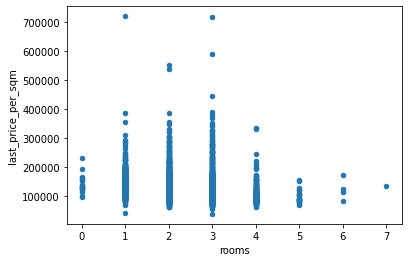

In [65]:
# оценим корреляцию между ценой и количеством комнат
display(clean_data_stpete_center['last_price_per_sqm'].corr(clean_data_stpete_center['rooms'])) 

# построим диаграмму рассеивания по переменным цены и комнат
clean_data_stpete_center.plot(x='rooms', y='last_price_per_sqm', kind='scatter')

**Вывод**

Взаимосвязь цены и количества комнат не сильно отличается от результатов по общим данным.

In [66]:
# поскольку категория этажа - это категориальная переменная,
# оценим зависимость цена от этой переменной через анализ средней и медианы по каждой категории
display(clean_data_stpete_center.query('floor_category == "first"')['last_price_per_sqm'].describe())
display(clean_data_stpete_center.query('floor_category == "last"')['last_price_per_sqm'].describe())
display(clean_data_stpete_center.query('floor_category == "others"')['last_price_per_sqm'].describe())

count       320.000000
mean     115059.952346
std       40167.581725
min       59649.122807
25%       92012.241484
50%      103649.455048
75%      126953.873529
max      387096.774194
Name: last_price_per_sqm, dtype: float64

count       443.000000
mean     122800.227073
std       42550.379354
min       54000.000000
25%       95207.052834
50%      112375.000000
75%      140873.519459
max      370497.017893
Name: last_price_per_sqm, dtype: float64

count      2026.000000
mean     135605.002174
std       50933.640456
min       37234.042553
25%      103921.568627
50%      127184.078824
75%      151064.137134
max      721518.987342
Name: last_price_per_sqm, dtype: float64

**Вывод**

Взаимосвязь цены и категории этажа не сильно отличается от результатов по общим данным.

-0.08342696370767816

<AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price_per_sqm'>

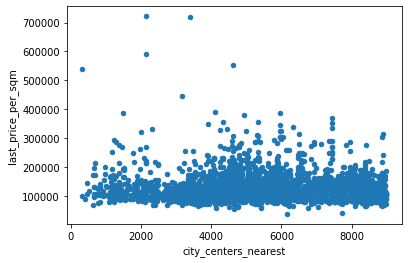

In [67]:
# оценим корреляцию между ценой и расстоянием до центра
display(clean_data_stpete_center['last_price_per_sqm'].corr(clean_data_stpete_center['city_centers_nearest'])) 

# построим диаграмму рассеивания по переменным цены и расстояния до центра
clean_data_stpete_center.plot(x='city_centers_nearest', y='last_price_per_sqm', kind='scatter')

**Вывод**

Взаимосвязь цены и удаленности от центра не сильно отличается от результатов по общим данным.

In [68]:
# поскольку время размещения - это категориальная переменная,
# оценим зависимость цена от этой переменной через анализ средней и медианы по каждой категории
display(clean_data_stpete_center.pivot_table(
    index='weekday_exposition',
    values='last_price_per_sqm', 
    aggfunc=('count', 'mean','median')
))
display(clean_data_stpete_center.pivot_table(
    index='month_exposition',
    values='last_price_per_sqm', 
    aggfunc=('count', 'mean','median')
))
display(clean_data_stpete_center.pivot_table(
    index='year_exposition',
    values='last_price_per_sqm', 
    aggfunc=('count', 'mean','median')
))

,count,mean,median
weekday_exposition,,,
0,413,131189.078071,122222.222222
1,486,129555.955237,120705.187947
2,481,132126.666520,123529.411765
3,550,132638.350559,122482.767942
4,481,130228.361935,121052.631579
5,214,131298.818881,124884.473198
6,164,131514.192227,125116.822430


,count,mean,median
month_exposition,,,
1,173,126819.339957,120967.741935
2,285,131303.549717,120767.494357
3,300,136047.744671,131785.133050
4,274,130599.672276,118653.831133
5,156,128061.177899,124608.011797
6,216,134744.808400,117634.375000
7,212,129912.777128,119380.183795
8,219,134413.766654,125000.000000
9,258,131201.743139,123883.127244


,count,mean,median
year_exposition,,,
2014,17,134886.157988,128750.000000
2015,212,127724.731611,120909.421918
2016,363,131400.283122,119047.619048
2017,1008,127980.654320,119387.871332
2018,889,131962.017931,123203.285421
2019,300,141892.252311,132535.014006


**Вывод**

Взаимосвязь цены и времени размещения не сильно отличается от результатов по общим данным.

**Общий вывод по факторам**

Степень зависимости цены квартир в центре Санкт-Петербурга от рассмотренных факторов очень схожа с результатами, полученными по данным в целом. Эти выводы могут быть использованы для дальнейшей работы.

## Общий вывод

В рамках проекта мы изучили имеющиеся данные и провели их предобработку. В частности, оценили пропуски, попытались определить их причину и устранить их там, где это было возможно. Также мы изменили типы некоторых данных.
Далее мы рассчитали несколько дополнительных показателей, самый важный из которых - это цена на квадратный метр.
Затем мы провели исследование и проанализировали имеющиеся данные. Определили, что на цену квартиры боле всего влияют факторы локации, удаленности от центра и этаж расположения квартиры.
Также мы определили какой срок продажи квартиры является быстрым, а какой медленным.

В итоге, для механизма автоматической оценки стоимости квартиры мы бы предложили учитывать факторы локации, этаж и удаленность от центра. Остальные факторы не показали высокой степени влияния на цену,  поэтому их следует использовать ограниченно.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

###### - [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-наименований-колонок" data-toc-modified-id="Изменение-наименований-колонок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение наименований колонок</a></span></li><li><span><a href="#Анализ-пропусков" data-toc-modified-id="Анализ-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-отдельных-параметров" data-toc-modified-id="Изучение-отдельных-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение отдельных параметров</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Обработка-редких-и-выбивающихся-значений" data-toc-modified-id="Обработка-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обработка редких и выбивающихся значений</a></span></li><li><span><a href="#Определение-факторов,-влияющих-на-цену-квартиры" data-toc-modified-id="Определение-факторов,-влияющих-на-цену-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение факторов, влияющих на цену квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-количества-комнат" data-toc-modified-id="Зависимость-цены-от-количества-комнат-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Зависимость цены от количества комнат</a></span></li><li><span><a href="#Зависимость-цены-от-расстояния-до-центра" data-toc-modified-id="Зависимость-цены-от-расстояния-до-центра-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Зависимость цены от расстояния до центра</a></span></li><li><span><a href="#Зависимость-цены-от-категории-этажа" data-toc-modified-id="Зависимость-цены-от-категории-этажа-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Зависимость цены от категории этажа</a></span></li><li><span><a href="#Зависимость-цены-от-времени-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-времени-размещения-объявления-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Зависимость цены от времени размещения объявления</a></span></li></ul></li><li><span><a href="#Анализ-по-населенным-пунктам" data-toc-modified-id="Анализ-по-населенным-пунктам-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ по населенным пунктам</a></span></li><li><span><a href="#Определение-центрального-района-Санкт-Петербурга" data-toc-modified-id="Определение-центрального-района-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Определение центрального района Санкт-Петербурга</a></span></li><li><span><a href="#Анализ-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Анализ-квартир-в-центре-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ квартир в центре Санкт-Петербурга</a></span><ul class="toc-item"><li><span><a href="#Изучение-отдельных-параметров-(центр-Санкт-Петербурга)" data-toc-modified-id="Изучение-отдельных-параметров-(центр-Санкт-Петербурга)-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Изучение отдельных параметров (центр Санкт-Петербурга)</a></span></li><li><span><a href="#Выделение-отдельных-факторов-(центр-Санкт-Петербурга)" data-toc-modified-id="Выделение-отдельных-факторов-(центр-Санкт-Петербурга)-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Выделение отдельных факторов (центр Санкт-Петербурга)</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>